### Student Information
Name: 連音祺

Student ID: 111070005

GitHub ID: roseeeea

Kaggle name: YinChiLien 111070005

Kaggle private scoreboard snapshot: 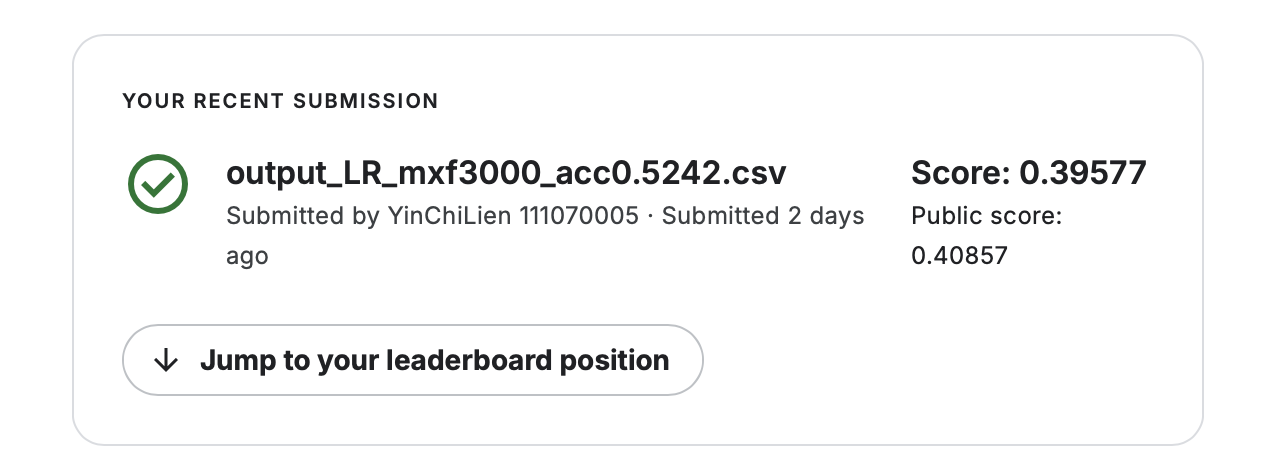


---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__.

In [ ]:
### Begin Assignment Here

----------
# PART 1: Master

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')

100%|██████████| 400k/400k [00:00<00:00, 22.3MB/s]

Extracting files...


100%|██████████| 3.29M/3.29M [00:00<00:00, 90.6MB/s]

Extracting files...


100%|██████████| 1.64G/1.64G [00:28<00:00, 61.9MB/s]

Extracting files...


Data source import complete.


In [ ]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.9 requires tensorflow>=2.2.0, which is not installed.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.3 which is incompatible.
langchain 0.3.9 requires numpy<2,>=1.22.4; python_version < "3.12", but you have numpy 2.1.3 which is incompatible.
langc

In [ ]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠴ pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏    0 B/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   0% ▕▏ 1.7 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   1% ▕▏  13 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   3% ▕▏  39 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   5% ▕▏  71 MB/1.3 GB                  pulling manifest 
pulling 74701a8c35f6...   7% ▕

In [ ]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠦ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏  81 KB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   1% ▕▏  22 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   2% ▕▏  39 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   5% ▕▏  92 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   6% ▕▏ 116 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   6% ▕▏ 123 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   7% ▕▏ 135 MB/2.0 GB                  pulling manifest 
pullin

In [ ]:
#Download model llava-phi3
!ollama pull llava-phi3

Streaming output truncated to the last 5000 lines.
pulling 377876be20ba...  43% ▕▏ 1.0 GB/2.3 GB  207 MB/s      6spulling manifest 
pulling 377876be20ba...  44% ▕▏ 1.0 GB/2.3 GB  207 MB/s      6spulling manifest 
pulling 377876be20ba...  45% ▕▏ 1.0 GB/2.3 GB  208 MB/s      6spulling manifest 
pulling 377876be20ba...  46% ▕▏ 1.1 GB/2.3 GB  208 MB/s      6spulling manifest 
pulling 377876be20ba...  47% ▕▏ 1.1 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  48% ▕▏ 1.1 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  49% ▕▏ 1.1 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  50% ▕▏ 1.2 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  52% ▕▏ 1.2 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  52% ▕▏ 1.2 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  53% ▕▏ 1.2 GB/2.3 GB  208 MB/s      5spulling manifest 
pulling 377876be20ba...  54% ▕▏ 1.3 GB/2.3 GB  208 MB/s   

In [ ]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


----
# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## 1.1 Load Data

In [ ]:
import pandas as pd

### training data
anger_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [ ]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


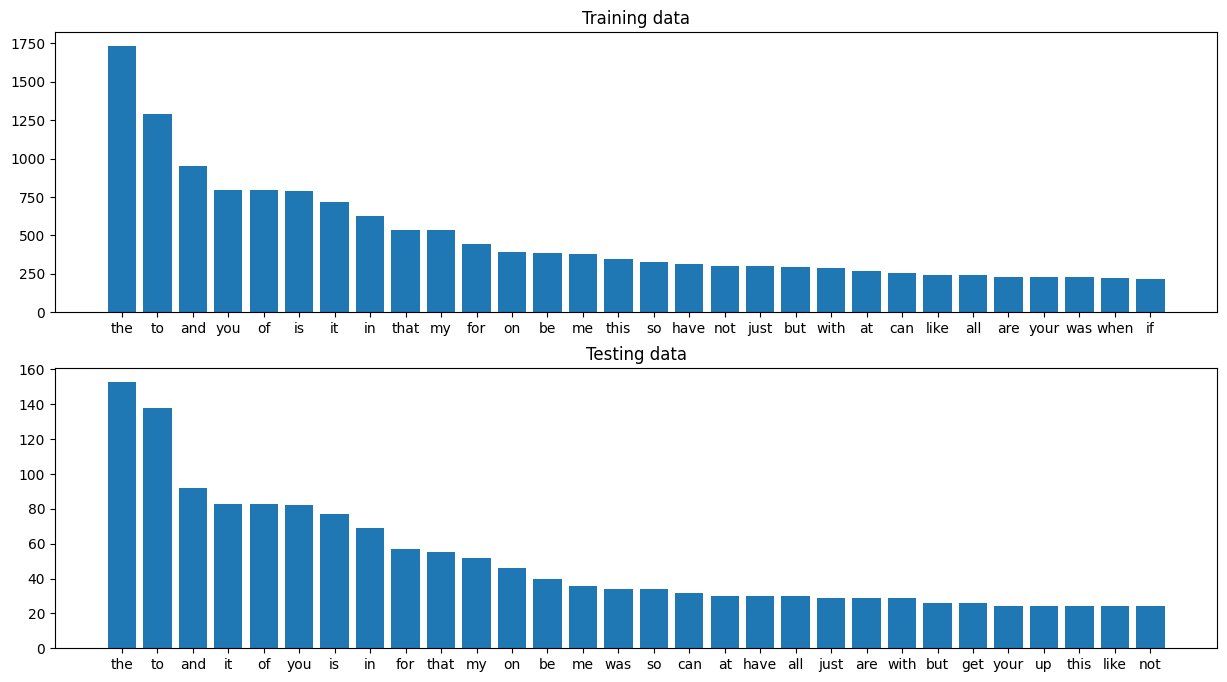

In [ ]:
# Answer here
from sklearn.feature_extraction.text import CountVectorizer

count_vect_train = CountVectorizer()
count_vect_test = CountVectorizer()
train_counts = count_vect_train.fit_transform(train_df['text'])
test_counts = count_vect_test.fit_transform(test_df['text'])

train_freq = train_counts.sum(axis=0).A1
test_freq = test_counts.sum(axis=0).A1

n=30
train_top_idx = train_freq.argsort()[-n:][::-1]
test_top_idx = test_freq.argsort()[-n:][::-1]

train_top_words = count_vect_train.get_feature_names_out()[train_top_idx]
test_top_word = count_vect_test.get_feature_names_out()[test_top_idx]

train_top_freq = train_freq[train_top_idx]
test_top_freq = test_freq[test_top_idx]

fig, axes = plt.subplots(2, 1, figsize=(15,8))
axes[0].bar(train_top_words,train_top_freq)
axes[0].title.set_text('Training data')
axes[1].bar(test_top_word,test_top_freq)
axes[1].title.set_text('Testing data')
plt.show()



---
### 1.2 Save data

In [ ]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [ ]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

### 1.3 Exploratory data analysis (EDA)

----
## 2. Feature engineering

### BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [ ]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [ ]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
#only the 500 most frequent words will be retained in the feature matrix.

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

## nltk: 會處理標點符號跟縮寫 -> "!" "do"+"n't"
## sklearn: 至少兩個字符的字母或數字組成的單詞，不處理縮寫、標點或語法結構

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_vect.fit(train_df['text'])

feature_names_tfidf = tfidf_vect.get_feature_names_out()
feature_names_tfidf[100:110]

array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

---
## 3. Model
### 3.1 Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

In [ ]:
# Answer here
'''
Each small block represents the relationship between the predicted and actual results.
For example, there are 18 instances of "fear" that are incorrectly predicted as "anger."
The blocks along the diagonal indicate correct predictions.

From the matrix, we can see that most of the predictions are accurate,
especially for the "fear" category.
However, the correct predictions are relatively lower for "sadness."
Another observation is that "anger" and "fear" are frequently confused with one another.
'''

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

multi_NBmodel = MultinomialNB()
multi_NBmodel.fit(X_train, y_train)

y_test_pred_NB = multi_NBmodel.predict(X_test)

acc_test_NB = accuracy_score(y_true=y_test, y_pred=y_test_pred_NB)

print('testing accuracy: {}'.format(round(acc_test_NB, 2)))
print(classification_report(y_true=y_test, y_pred=y_test_pred_NB))

testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [ ]:
# Answer here
'''
The accuracy score indicates that the Multinomial Naive Bayes model is more accurate than the Decision Tree model,
likely because the categories are more independent,
aligning well with Naive Bayes' assumption of feature independence.
Specifically, Naive Bayes achieves higher F1-scores in the "fear" and "joy" categories,
whereas the Decision Tree model performs better in "anger" and "sadness."
This suggests that "fear" and "joy" have more distinct,
independent features, while "anger" and "sadness" depend more on combined or interacting cues.
'''

---
## 6. Deep Learning

In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train) #將每個label 轉成數字型態類別（1, 2, 3...）
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc) #轉成 one-hot code

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1) #轉成數值
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1477    fear
886     fear
1953    fear
2826     joy
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_) #輸出數量->class 類別數量
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

'''
Input() 是 Keras 用來定義模型輸入的一個函數，指定輸入數據的形狀。
其返回值是一個 張量 (Tensor)，表示數據流入模型的入口。
Input(shape=(features,))
'''
# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

'''
Keras 的 函數式 API (Functional API)
隱藏層不用手動告訴模型，因為它們是由輸入層和輸出層之間的連接隱式確定的。
'''
# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')
# CSVLogger 是 Keras 提供的一個回調函數 (callback)，將訓練日誌（例如損失值、準確率等指標）保存到 CSV 檔案中

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)


113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3387 - loss: 1.3531 - val_accuracy: 0.4380 - val_loss: 1.2766
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6046 - loss: 1.0720 - val_accuracy: 0.6282 - val_loss: 0.9486
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7907 - loss: 0.6077 - val_accuracy: 0.6916 - val_loss: 0.7945
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8580 - loss: 0.4094 - val_accuracy: 0.6916 - val_loss: 0.8252
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8913 - loss: 0.3254 - val_accuracy: 0.6945 - val_loss: 0.8421
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9114 - loss: 0.2612 - val_accuracy: 0.7061 - val_loss: 0.9033
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9314 - loss: 0.2060 - val_accuracy: 0.6974 - val_loss: 0.9256
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9449 - loss: 0.1780 - val_accuracy: 0.6888 - val_

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step 

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


array([[3.05862341e-04, 1.09460108e-01, 7.65968561e-01, 1.24265485e-01],
       [5.00424812e-03, 1.95261200e-05, 3.67916655e-04, 9.94608343e-01],
       [8.10966074e-01, 1.11731479e-03, 3.27323642e-06, 1.87913492e-01],
       [9.99827623e-01, 3.73204921e-06, 9.85921870e-05, 7.00343880e-05],
       [6.71118141e-06, 9.99925554e-01, 4.43496937e-08, 6.77473799e-05]],
      dtype=float32)

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'sadness', 'anger', 'anger', 'fear'], dtype=object)

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.381124,1.323711,0.438040,1.276623
1,1,0.646277,0.969082,0.628242,0.948598
2,2,0.787711,0.580147,0.691643,0.794466
3,3,0.846388,0.411650,0.691643,0.825236
4,4,0.884307,0.328555,0.694524,0.842091
5,5,0.905342,0.266659,0.706052,0.903272
6,6,0.921672,0.224262,0.697406,0.925632
7,7,0.939939,0.185219,0.688761,0.978541
8,8,0.951841,0.162145,0.685879,1.069229
9,9,0.961251,0.142027,0.688761,1.130377


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!

<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

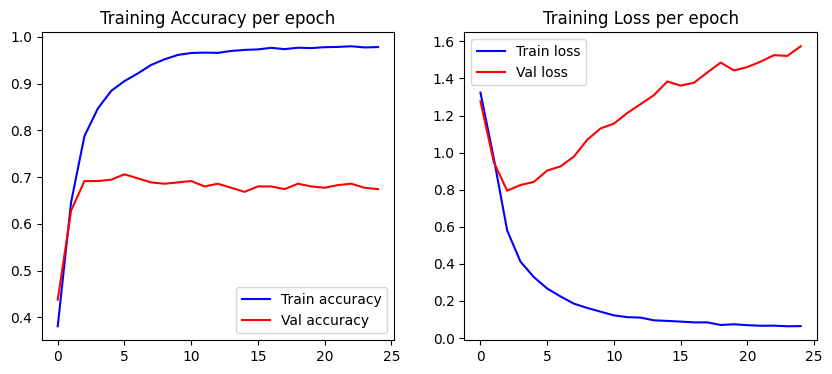

In [ ]:
# Answer here
fig, axes = plt.subplots(1, 2, figsize=(10,4))

accu_train = training_log["accuracy"]
accu_val = training_log["val_accuracy"]
axes[0].plot(training_log["epoch"], accu_train, label="Train accuracy", color="b" )
axes[0].plot(training_log["epoch"], accu_val, label="Val accuracy", color="r" )
axes[0].title.set_text('Training Accuracy per epoch')
axes[0].legend()


loss_train = training_log["loss"]
loss_val = training_log["val_loss"]
axes[1].plot(training_log["epoch"], loss_train, label="Train loss", color="b" )
axes[1].plot(training_log["epoch"], loss_val, label="Val loss", color="r" )
axes[1].title.set_text('Training Loss per epoch')
axes[1].legend()

plt.show()

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = f"{didiersalazar_google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
'''
we can use those sequence of words average vecter
to represent the overal meaning of sentense and train our model.
'''

---
## 8. Clustering: k-means

## 9. High-dimension Visualization: t-SNE and UMAP

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + fear_words + sad_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

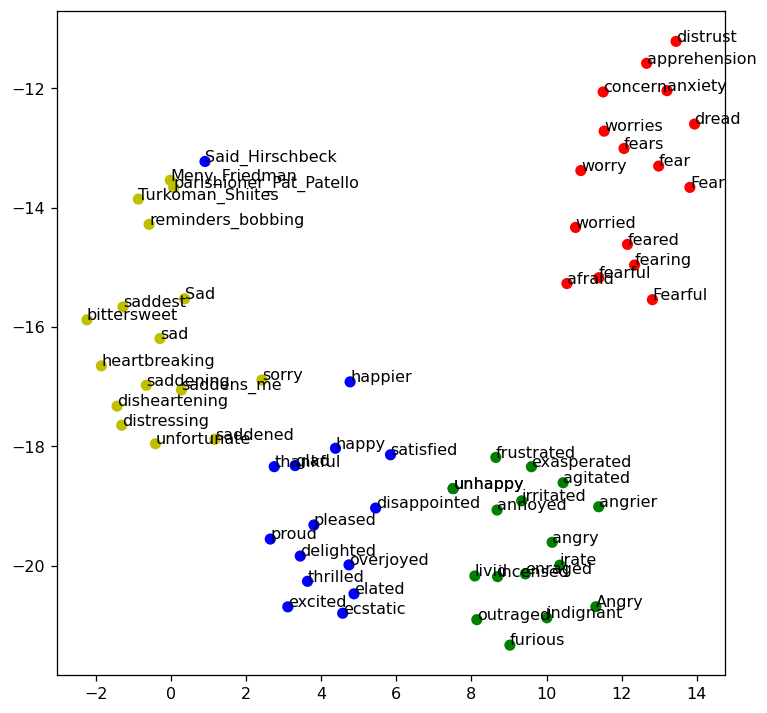

In [ ]:
# Answer here
# tSNE
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key) #選取模型中的前 200 個常見單詞（這些單詞按模型中的頻率排序）。
word_train = target_words + all_word[:size]
X_train = model[word_train] # -> word vector

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


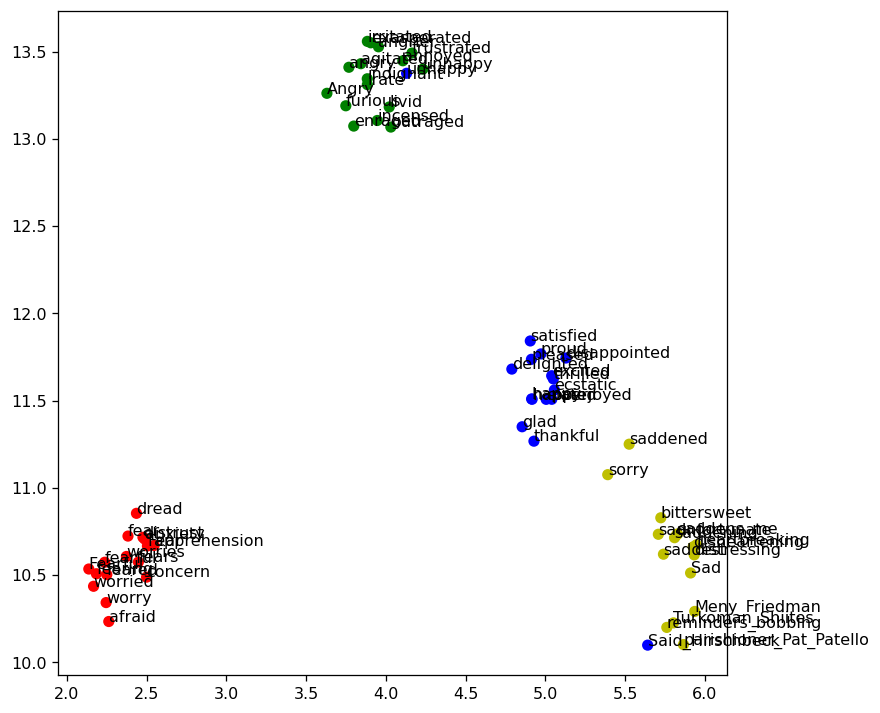

In [ ]:
# Answer here
# Umap
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key) #選取模型中的前 200 個常見單詞（這些單詞按模型中的頻率排序）。
word_train = target_words + all_word[:size]
X_train = model[word_train] # -> word vector

## umap model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
## 10. Large Language Models (LLMs)

In [ ]:
import ollama

----
### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [ ]:
# Answer here
response4 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'/content/DM_self_sample.jpg'] #Image with people studying
    },
])

display(Markdown(response4['message']['content']))

In the image, a man with short hair is engrossed in reading a book. He's seated at a wooden desk, which also holds a white mug and a black notebook. The background reveals a white wall adorned with a calendar hanging on it. The text "SHORT" and the month of "JANUARY" can be discerned from the calendar. The man's focus is directed downwards, towards his book and the desk before him. The image captures a moment of quiet study or work.

In [ ]:
'''
Most of the description is highly related to. picture. However, the relation and action in the pictures are not right.
firstly, he sat "in front of desk" not at desk.
The mug and notebook is on the desk.
The calender is August.
'''

---

### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.


In [ ]:
!ollama pull llama3.2

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest ⠏ pulling manifest ⠋ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏ 275 KB/2.0 GB                  pulling manifest 
pulling dde5aa3f

In [ ]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url1="https://www.apollo-magazine.com/jugendstil-made-in-munich-kunsthalle-review/"
url2="https://www.dailyartmagazine.com/mcmichael-canadian-art-collection-staff-picks/"
url3="https://www.dailyartmagazine.com/the-art-of-being-sick/"

# Create the retriever
retriever1 = load_and_retrieve_docs(url1)
retriever2 = load_and_retrieve_docs(url2)
retriever3 = load_and_retrieve_docs(url3)

# Merge retrievers (we'll concatenate their results later in the RAG chain)
retrievers = [retriever1, retriever2, retriever3]

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}" #有上下文的提問（「問題 + 上下文」的格式構造提示文字）
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    # Combine the results of all retrievers
    retrieved_docs = []
    for retriever in retrievers:
        retrieved_docs.extend(retriever.invoke(question))  # Retrieve and add documents from each retriever
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)


# Use the RAG chain
result1 = rag_chain("What did the designer August Endell announced? ")
result2 = rag_chain("What artiests do the article introduce?")
result3 = rag_chain("How did Jan Steen depict the sick woman?")
display(Markdown(result1))
display(Markdown(result2))
display(Markdown(result3))

[Document(metadata={'source': 'https://www.apollo-magazine.com/jugendstil-made-in-munich-kunsthalle-review/', 'title': 'How Jugendstil transformed Munich | Apollo Magazine', 'description': 'Artists and designers turned the city into a hive of creativity in the late 19th century – and their spirit can still be felt today, writes Corinna Lotz', 'language': 'en-US'}, page_content='How Jugendstil transformed Munich | Apollo Magazine\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<iframe  src="//www.googletagmanager.com/ns.html?id=GTM-PWMWG4" height="0" width="0" style="display:none;visibility:hidden">\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n\n\n<img  height="1" width="1" style="display:none" src="https://www.facebook.com/tr?id=183898858624093&amp;ev=PageView&amp;noscript=1">\n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nApollo\n\nCurrent Issue\nFeatures\nInterviews\nComment\nReviews\n\n\n\n\n\n\n\n\nNav toggle\n\n\n\nSubscribe\n\n\n\n\nRegister

Unfortunately, there is no mention of what August Endell announced in the provided text. The text appears to be a description of various artworks in the McMichael Canadian Art Collection, including paintings by Mary Pratt, Clarence Gagnon, and Howie Tsui, as well as a watercolor painting by Ann MacIntosh Duff.

The article introduces three artists:

1. Egon Schiele
2. Morton Schamberg
3. Guillaume Apollinaire
4. Gustav Klimt

These artists were all affected by the Spanish Flu and are mentioned as having passed away due to the disease, although not all of them are specifically linked to it in the text (only Schiele and Schamberg's connection is explicitly stated).

The text does not specifically describe how Jan Steen depicted the sick woman in a painting. However, it does mention that the author found that sickness in art is often portrayed as being associated with women.

There are several paintings by Jan Steen that depict sick people, including "A Mother's Care" (also known as "The Sick Child"), which shows a mother tending to her sick child. In this painting, the mother is shown sitting next to her child, holding their hand and looking concerned. The child is lying in bed, looking pale and weak.

It is also worth noting that Steen often depicted women in his paintings, including those who were sick or caring for sick family members. However, the text does not specifically discuss how Steen depicted these women in terms of color or composition.

In [ ]:
'''
ans1: Not right
 In 1898, the architect and designer August Endell announced:
 ‘We stand at the beginning of an entirely new kind of art,
 with shapes that do not have a meaning,
 that do not represent anything and remind us of nothing,
 that stir our soul as deeply as only music does.’

ans2: Sort of (the answer is including in 1st answer)
Mary Pratt
Clarence Gagnon
Howie Tsui
Itee Pootogook
Ann Maclntosh
Lawren Harris

ans3:Not right
The lady dressed in a rich,
shimmering dress confesses her love-sickness.
It clearly must be very physically draining,
if you take a look at her eyes.
Suppressed desire led to a vague syndrome known as “hysteria”.
Listening to her is an old woman. She listens with interest,
a lewd smile on her face.
But what is most interesting is the implement she’s holding,
which is an enema syringe.
--------
advantages:
it can help us grasp the main idea of the articles.

disadvantages:
the model can not really answer the details of articles.
If the question is ambiguous, the model can not really interpret and understand the question. (but in reality, people usually ask ambigous questions)

'''


---
### 10.4 Generating LLM Embeddings:

In [ ]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

In [ ]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [ ]:
df_train.head()

,id,text,emotion,intensity
1917,21060,Huns are like a box of coffee revels,fear,0.229
410,10410,Why a puerto Rican with Taino hair and a black...,anger,0.500
2432,30428,i fix a clever ritual to make you feel frolicsome,joy,0.480
1138,20281,Jesus wept! Another RNS from #rusty @metaltige...,fear,0.637
2709,30705,"@Spotted_H0rse I'm spry, though",joy,0.260


In [ ]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

In [ ]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

In [ ]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [ ]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [ ]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [ ]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

In [ ]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.477166,1.186390,0.567723,1.078123
1,1,0.654304,0.847144,0.561960,1.047308
2,2,0.733186,0.667385,0.570605,1.084228
3,3,0.801273,0.541133,0.573487,1.179287
4,4,0.834763,0.446372,0.567723,1.197879
5,5,0.879601,0.346634,0.559078,1.417966
6,6,0.900083,0.287050,0.544669,1.425339
7,7,0.921672,0.229584,0.538905,1.602570
8,8,0.925823,0.209504,0.544669,1.700851
9,9,0.946582,0.163462,0.547550,1.836175


---
### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

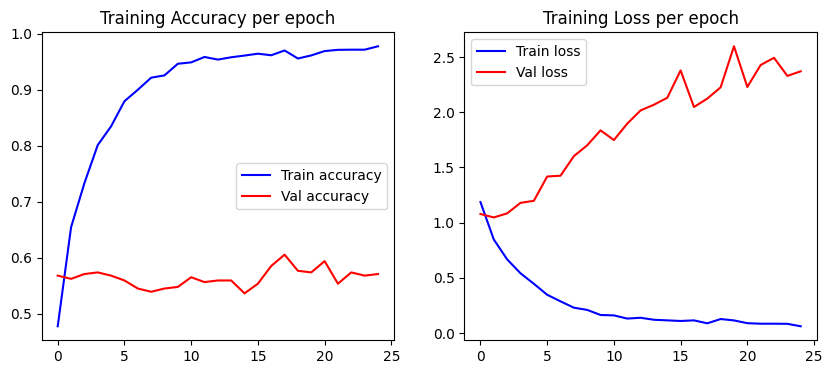

In [ ]:
# Answer here
fig, axes = plt.subplots(1, 2, figsize=(10,4))

accu_train = training_log["accuracy"]
accu_val = training_log["val_accuracy"]
axes[0].plot(training_log["epoch"], accu_train, label="Train accuracy", color="b" )
axes[0].plot(training_log["epoch"], accu_val, label="Val accuracy", color="r" )
axes[0].title.set_text('Training Accuracy per epoch')
axes[0].legend()


loss_train = training_log["loss"]
loss_val = training_log["val_loss"]
axes[1].plot(training_log["epoch"], loss_train, label="Train loss", color="b" )
axes[1].plot(training_log["epoch"], loss_val, label="Val loss", color="r" )
axes[1].title.set_text('Training Loss per epoch')
axes[1].legend()

plt.show()

In [ ]:
'''
KNN and NN:
the accuracy of NN is much higher than KNN,
indicating that NN captures class-specific features more effectively than KNN
Both have good prediction power in "fear" emotion.
Relatively, the sadness do not improve much when transfering from KNN to NN

LLM embedding and other embedding:
LLM embedding compared to other model obtained lower accuracy.
The reason is possibly that other model like Naive Bayes or Desicion Tree is constructed based on local inherent input
but  LLM embeddings are pretrained on general language tasks.
'''

'\nKNN and NN:\nthe accuracy of NN is much higher than KNN, \nindicating that NN captures class-specific features more effectively than KNN\nBoth have good prediction power in "fear" emotion.\n'

---
### 10.5 Few-Shot Prompting

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here
'''
The accuracy results show that 5-shot prompting achieves the highest accuracy,
followed by 0-shot, and then 1-shot. For the 1-shot model,
1 shot model:
the single labeled example provided for the "anger" class improves the number of correct classification of "anger" compared to 0-shot.
however, the recall =1, precision=0.38, It implies that the model will tend to classify(emphasize) the sample to "angry" .

5 shot model:
In the 5-shot model, the inclusion of multiple labeled examples for all classes leads to improved classification accuracy across all emotion categories compared to 0-shot.
'''